## Mathematical Principles in Pattern Recognition (2017/2018)
$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bb}{\mathbf{b}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$
$\newcommand{\bA}{\mathbf{A}}$
$\newcommand{\bQ}{\mathbf{Q}}$
$\newcommand{\bR}{\mathbf{R}}$
$\newcommand{\bX}{\mathbf{X}}$

# Lab 2

In the computer labs we will work with the Python programming language within a Jupyter notebook. Each week a new notebook is made available that contains the exercises that are to be handed-in. 

* You are expected to work in pairs.
* Only one of each pair has to submit on blackboard. Make sure that you add the student ID of your partner in the submission comments.
* The main notebook file you submit should read "Lab[number]_[last name 1]_[last name 2].ipynb", for example "Lab2_Bongers_Versteeg.ipynb". 
* Please make sure your code will run without problems!

Feel free ask any questions during the computer lab sessions, or email the TA, Elise (e.e.vanderpol@uva.nl).

**The due date for the labs is Friday, Sep 22 at 15:00**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1 Simple linear regression
In this exercise, you will generate noisy data for a simple linear system $y = \beta_0 + \beta_1 x$ where we have one target and one predictor variable, and compute the solution of least-squares estimator using linear algebra.

### 1.1 Generate data
**[10 points]** Sample 20 datapoints $({x_i, y_i})$ for the following model: 
$$x \in \mathcal{N}(0, 3)$$
$$y = \beta_0 + \beta_1 x + \epsilon \mathrm{,}$$
where $\epsilon \in \mathcal{N}(0,1)$ is standard normal and the parameters $\beta_0$ and $\beta_1$ are both taken randomly __once__ in the interval $(0,1)$ (and are thus kept fixed during sampling!). Make a scatterplot of your data.

Y = 0.1 + 0.9 * X + e


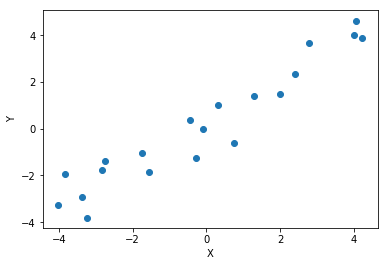

In [2]:

# Makes sure that we always get the same random data
np.random.seed(4294967295)

# Sample
n = 20

# b0 is the Y intersect, b1 is the weight
b0 = round(random.uniform(0, 1), 1)
b1 = round(random.uniform(0, 1), 1)

# Error vector
e = np.random.normal(0, 1, n)

# Input vector
X = np.random.normal(0, 3, n)

# The output sample
Y = b0 + b1 * X + e

# Scatterplot of X and Y
print("Y =", b0, "+", b1, "* X + e", )
plt.scatter(X, Y)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

### 1.2  LS solution
**[15 points]** What is the solution of the least-squares estimate for the parameters $\hat{\bb} = (\hat{\beta}_0, \hat{\beta}_1)$ for model $y = \beta_0 + \beta_1 x$ in terms of the dependent variable $y$ and the design matrix $\mathbf{X}$? Write the solutions to these normal equations down in closed form in the markdown cell below. What are the dimensions of $\hat{\bb}$, $\bX$ and $\by$? 


Hint: see Bishop chapter 3, it helps to write the model in vectorized form!

### $\color{red}{Answer}$

Vectorized form:

$\hat{\bb} = (X'X)^{-1} X'Y$
***

Dimensions:

$\hat{\bb}\substack{[2,1]}$

$X\substack{[20,2]}$

$Y\substack{[20,1]}$


$\color{red}\#$

### 1.3 Compute estimates
**[10 points]** Create the design matrix $\bX$ and compute the point estimation for the parameters $\hat{\bb}$ using the simulated data from 1.1.

In [3]:
# bHat = (X′X)^−1 X′Y
regression = lambda Xd, Y: np.linalg.inv(Xd.T @ Xd) @ Xd.T @ Y

# # Converting indepedent x's to design matrix X(nx2)
Xd = np.c_[np.ones(X.shape), X]

# Show dimensions
print("shape Y:\t", Y.shape)
print("shape Xd:\t", Xd.shape)

# Calculate bHat of (2x1)
bHat = regression(Xd, Y)
print("\nbHat:\t\t", bHat)

shape Y:	 (20,)
shape Xd:	 (20, 2)

bHat:		 [ 0.25049622  0.88991013]


### 1.4 Plotting
**[5 points]** Plot the model with the estimated parameters and the true parameters in the same scatterplot as the original data. 

Y = 0.1 + 0.9 * X + e


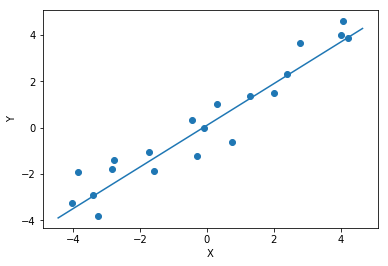

In [4]:
# Scatterplot of X, Y and estimated parameters
print("Y =", b0, "+", b1, "* X + e", )

# Function that draws a line between plot bounds
def pltEstimation(b0, b1):
    bounds = plt.axis()
    plt.plot([bounds[0], bounds[1]], [b0 + b1 * bounds[0], b0 + b1 * bounds[1]])
    
plt.scatter(X, Y)
pltEstimation(b0, b1)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

## 2 Multiple linear regression
Here we go from simple to multiple linear regression, and encounter some difficulties that may arise.

### 2.1 Repeating for multiple regression
**[30]** Now sample 20 datapoints from a more complex model with multiple prediction variables:
$$x_1 \in \mathcal{N}(0, 3)$$
$$x_2 \in \mathcal{N}(0, 2)$$
$$x_3 \in \mathcal{N}(0, 3)$$
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon \mathrm{,}$$
where $\epsilon$ is again standard normal and the $\beta_i$ are all randomly set in $(0,1)$. Repeat the above assignment by computing $\bX$ and the least squares estimate of the parameters $\hat{\bb}$. Print the results for  $\hat{\bb}$ and the original parameters $\bb$ together as a check.

Hint: if you vectorized the computation in 1.3 correctly, you could re-use some code.

In [5]:

# Local multiple regression variables initialized
def performMultipleRegression():
    # Makes sure that we always get the same random data
    np.random.seed(123194)

    # b0 is the Y intersect, b1 is the weight
    b0 = round(random.uniform(0, 1), 1)
    b1 = round(random.uniform(0, 1), 1)
    b2 = round(random.uniform(0, 1), 1)
    b3 = round(random.uniform(0, 1), 1)

    # Input vectors
    x1 = np.random.normal(0, 3, n)
    x2 = np.random.normal(0, 2, n)
    x3 = np.random.normal(0, 3, n)

    # Error vector
    e = np.random.normal(0, 1, n)

    print("b0:\t", b0)
    print("b1:\t", b1)
    print("b2:\t", b2)
    print("b3:\t", b3)
    # Design matrix
    Xd = np.c_[np.ones(x1.shape), x1, x2, x3]
    # The output sample
    Y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + e
    
    bHat = regression(Xd, Y)
    print("\nbHat:\t", bHat)
    
performMultipleRegression()


b0:	 0.2
b1:	 0.5
b2:	 0.2
b3:	 0.5

bHat:	 [ 0.17048001  0.52349961  0.02537308  0.34448834]


We have loaded some multivariate data, comprising of one target $y$ and 3 predictor variables $x_i$ as an example. 

In [6]:

# Refactored file loading function
data = np.load('assets/data.npz')
x_example = data['x']
y_example = data['y']
designmatrix_example = data['designmatrix']
    
print("shape y_example:\t\t", y_example.shape)
print("shape x_example:\t\t", x_example.shape)
print("shape designmatrix_example:\t", designmatrix_example.shape)


shape y_example:		 (30,)
shape x_example:		 (30, 3)
shape designmatrix_example:	 (30, 4)


### 2.2 Example data
**[5 points]** Use the designmatrix $\bX$ and target variable $\by$ from the data loaded above in your implementation from problem 2 to get a least-square estimate for $\bb$ assuming a linear regression model. What happens, and why?

In [7]:

# Calculate bHat for example data
# bHat = regression(designmatrix_example, y_example)
# print("\nbHat:\t\t", bHat)

# throws "LinAlgError: Singular matrix"


### $\color{red}{Answer}$

A singular matrix has no inverse, so it throws the error: "LinAlgError: Singular matrix".

$\color{red}\#$

We can factor any complex (and thus real-valued) $m \times n$ matrix $\bA$ in terms of an $m \times n$ orthogonal matrix $\bQ$ and an $n \times n$ upper triangular matrix $\bR$, a so-called QR decomposition.  
### 2.3 QR decomposition
**[10 points]** Rewrite the solution to the normal equations from 1.2 in terms of the QR decomposition of the designmatrix. Why could this form be more preferred?

### $\color{red}{Answer}$

Vectorized form:

$\hat{\bb} = (X'X)^{-1} X'Y$

Met de Gram-Schmidtmethode kan een orthonormale basis worden gevonden van de designmatrix (Q).

De designmatrix:

$\bA = QR$

De orthogonale basis = [V1 = X1, V2 = X2 – ((X2 * V1) / (V1 * V1))V1], dus: (dit is afgerond)

Q = [V1 = X1, V2 = X2 – ((X2 * V1) / (V1 * V1))V1]

Om de driehoeksmatrix ziet er als volgt uit: [A1 * Q1, A2 * Q1], [0, A2 * Q2] dus:

R = [A1 * Q1, A2 * Q1], [0, A2 * Q2]

$\therefore$

$\hat{\bb} = (QR'QR)^{-1} QR'Y$

$\color{red}\#$

### 2.4 Implementation
There are many different methods to calculate the QR decomposition to find here we will use a modified Gram-Schmidt orthogonalization algorithm as seen below.

In [8]:

# Replaced buggy version by new one
def modified_gram_schmidt(mat):
    mat = mat.copy()
    m, n = mat.shape
    
    q = np.zeros((m,n))
    r = np.zeros((n,n))

    for k in range(n):
        r[k, k]     = np.linalg.norm(mat[:, k])
        q[:, k]     = mat[:,k]/r[k,k]
        r[k, k+1:n] = np.dot(q[:,k], mat[:,k+1:n])
        mat[:, k+1:n] = mat[:,k+1:n] - np.outer(q[:,k], r[k,k+1:n])
    return q, r


**[10 points]** Explain __roughly__ why this algorithm would return an orthogonalized $\bQ$ (you are allowed to add comments to the code above). Apply it on the designmatrix of your example, show that the decomposition works and calculate an estimate $\hat{\bb}$.

In [9]:

# See explanation of question 2.3

# Modify designmatrix using the gram-schmidt process
QR = modified_gram_schmidt(designmatrix_example)
Q = QR[0]
R = QR[1]
designmatrix_modified = Q @ R

print("shape Q:\t\t\t", Q.shape)
print("shape R:\t\t\t", R.shape)
print("shape designmatrix_modified:\t", designmatrix_modified.shape)
    
# Regression
bHat = regression(designmatrix_modified, y_example)
print("\nbHat:\t\t", bHat)


shape Q:			 (30, 4)
shape R:			 (4, 4)
shape designmatrix_modified:	 (30, 4)

bHat:		 [ 0.0328986   0.03589633  0.25279771  0.59985052]


## 2.5 Numpy
**[5 points]**  Use the least-squares implementation in _numpy_ on the example data to get the parameters for $\by = \bX \bb$  and compare with what you found in 2.2 and 2.4.

In [11]:

# Numpy linear least squares
bHat = np.linalg.lstsq(designmatrix_modified, y_example)[0]
print("\nbHat:\t\t", bHat)

# As you can see, the answer to bHat differs from the regression() function's answer



bHat:		 [ 0.04207626  0.22487111  0.25279771  0.22487111]
